<h1><strong>CSCI 4455/5455&ndash; Fall 2021</strong></h1>

<h2><strong>Assignment 2 - Data Warehousing & OLAP</strong></h2>

<h3><strong><span style="color:#cc3300;">Due: October 27, 11:59pm </span></strong></h3>

<h3><strong>Your name:</strong></h3>

<ul>
<li style="text-align: justify;">Please note that you must do this assignment&nbsp;<span style="color: #cc3300;"><strong><u>individually</u></strong></span>. Using automatic tools, your code will be checked against other submissions and other existing resources (such as websites and books).</li>
<li style="text-align: justify;">This assignment is more extensive and might take longer than previous assignments to finish. <span style="color: #339966;"><strong><u>Please start early on.</u></strong></span></li>
<li style="text-align: justify;">Review the lecture notes before starting with this assignment. Then, thoroughly read this document before starting with the implementation or thinking about the solution.</li>
<li style="text-align: justify;">If you have technical questions about Python, please Google the error messages and share the error message alongside the solution that got it fixed on Microsoft Teams, as your classmates may run into the same issues.</li>
<li style="text-align: justify;">Check Canvas regularly for possible clarifications and updates.</li>
<li style="text-align: justify;">In this assignment, you will design and implement a data warehouse from scratch and use the data warehouse to answer some analytical decision-making questions.</li>
</ul>


<h2>Dataset</h2>

<p style="text-align: justify;">The dataset for this assignment can be found on this <a href="https://www.kaggle.com/rounakbanik/the-movies-dataset">Kaggle link.</a>
Please read the data described on this page. We have also uploaded a copy of the data archive in Canvas for your reference. <br>
    
After you download and extract the archive, you should be able to find the following CSV files:
</p>

<img src="Files.png">

<h2>Implementation</h2>

<p style="text-align: justify;">Consider yourself as a data scientist employee of a tech company. One day your boss gives you the above dataset and asks you to design and implement a data warehouse model for the company. Your data warehouse should enable efficient answering of the following queries:<br>
    
<ol>
<li><strong>Details of the Production Company:</strong></li>
</ol>
<ul>
<li style="list-style-type: none;">
<ul style="list-style-type: square;">
<li>Revenue per year (rpy.csv)</li>
<li>Budget per year (bpy.csv)</li>
<li>Profit per year (ppy.csv)</li>
<li>Average popularity of the produced movies per year (apy.csv)</li>
<li>Releases by genre per year (rgpy.csv)</li>
</ul>
</li>
</ul>
<ol start="2">
<li><strong>Movie Genre Details:</strong></li>
</ol>
<ul>
<li style="list-style-type: none;">
<ul style="list-style-type: square;">
<li>Revenue by genre per year (regpy.csv)</li>
<li>Budget by genre per year (bgpy.csv)</li>
<li>Profit by genre per year (pgpy.csv)</li>
<li>Most popular genre by year (mpgy.csv)</li>
</ul>
</li>
</ul>
</p>

<h2>Question 1</h2>

<p style="text-align: justify;">Prepare and submit your design of the data warehouse schema. Choose a schema suitable for your database based on the discussion about data warehouse schemas in class. (our suggestion is using the star schema, but you can choose other schemas as well)

Note: You can insert your answer as a picture. if that's the case, make sure to submit a single zip file consisting this notebook and the picture file together.
</p>

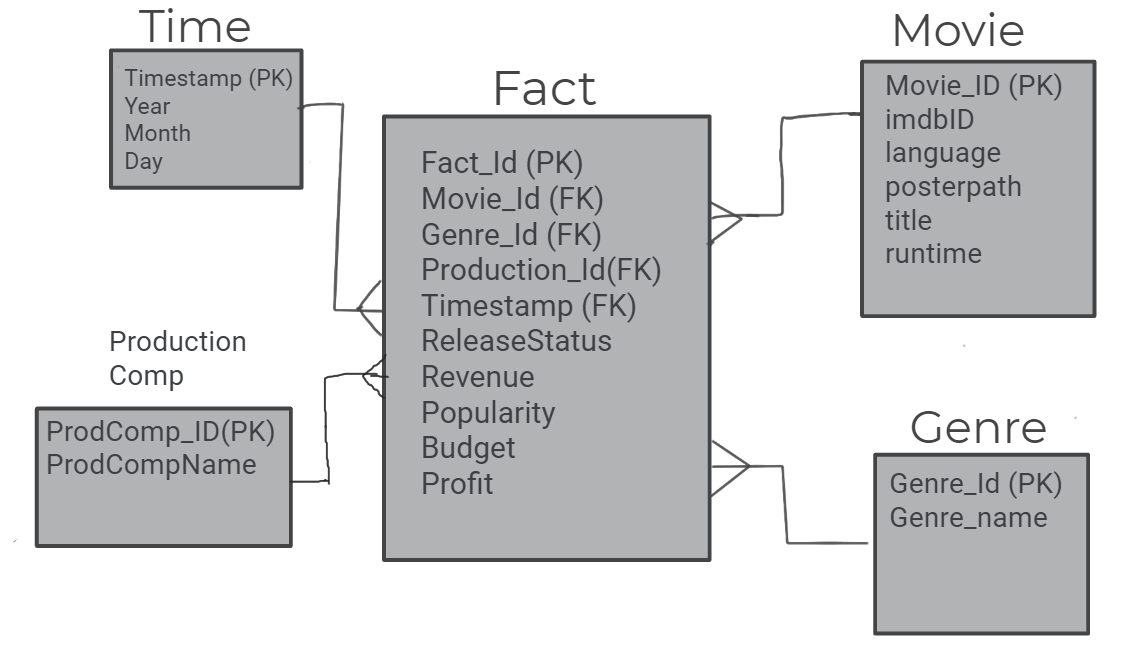

<h2>Question 2</h2>

<p style="text-align: justify;">Implement a database to store your data warehouse based on your design.</p>

<p style="text-align: justify;">Your code should take the movies_metadata.csv path from the user to populate the database</p>

<p style="text-align: justify;"><strong>Hint1:</strong> You will need to design a database for this part of the assignment. You can choose between Pandas Dataframe or <a href="https://realpython.com/python-mysql/">MySQL</a> database to implement your database. If you&rsquo;re not sure about which one to choose, please take a look at this <a href="https://towardsdatascience.com/sql-vs-pandas-which-one-to-choose-in-2020-a98f236829ef">link</a>.</p>

<p style="text-align: justify;"><strong>Hint 2:</strong> Some of the items, like the genre column, have been stored as a list of dictionaries. You can use the <a href="https://www.geeksforgeeks.org/read-json-file-using-python/">“json.loads()”</a> and <a href="https://www.kite.com/python/docs/ast.literal_eval">“ast.literal_eval()”</a>  functions from json and ast libraries, respectively, to parse through these types of columns quickly.

In [1]:
# wrtie the code you implemented to create and populate the database here
# you can insert more cells below, if needed

In [2]:
import pandas as pd

In [3]:
import os
from collections import defaultdict
import json

In [4]:
d = defaultdict()
datapath = "../dataset/"
for file in os.listdir(datapath):
    filename = file.split(".")[0]
    d[filename] = pd.read_csv(os.path.join(datapath,file))

In [5]:
os.listdir(datapath)

['credits.csv',
 'keywords.csv',
 'links.csv',
 'links_small.csv',
 'movies_metadata.csv',
 'ratings.csv',
 'ratings_small.csv']

In [6]:
movie_metadata_path = input("Enter the movie metadata path : ")

Enter the movie metadata path : ../dataset/movies_metadata.csv


In [7]:

movie_metadata = pd.read_csv(movie_metadata_path)

In [8]:
movie_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
import ast
import json

In [10]:
facttable = pd.DataFrame(columns =["Movie_Id","Genre_Id","Timestamp","Revenue","Popularity","Budget","Profit"])

In [11]:
movietable = pd.DataFrame(columns = ["Movie_Id","imdbId","language","posterpath","title","runtime"])

In [12]:
timetable = pd.DataFrame(columns = ["timestamp","Year","Month","day"])

In [13]:
from functools import reduce
from tqdm import tqdm

In [50]:
def convert(x):
    try:
        out = [i for i in ast.literal_eval(x)]
        return out
    except:
        return None
genMapOut = map(lambda x: convert(x), movie_metadata["genres"])
filterout = filter(lambda x: x != None, genMapOut)
genReduceOut = reduce(lambda x,y: x + y ,filterout)
genTable = pd.DataFrame(genReduceOut)
genTable.columns = ["Genre_Id","Genre_name"]
genTable = genTable.drop_duplicates().reset_index(drop = True)
genTable.head()

,Genre_Id,Genre_name
0,16,Animation
1,35,Comedy
2,10751,Family
3,12,Adventure
4,14,Fantasy


In [52]:
def convert(x):
    try:
        out = [i for i in ast.literal_eval(x)]
        return out
    except:
        return None
prodMapOut = map(lambda x: convert(x), movie_metadata["production_companies"])
prodfilterout = filter(lambda x: x != None, prodMapOut)
prodReduceOut = reduce(lambda x,y: x + y ,prodfilterout)
prodTable = pd.DataFrame(prodReduceOut)
prodTable.columns = ["ProdCompname","ProdComp_Id"]
prodTable = prodTable.drop_duplicates().reset_index(drop = True)
prodTable = prodTable[["ProdComp_Id","ProdCompname"]]
prodTable.head()

,ProdComp_Id,ProdCompname
0,3,Pixar Animation Studios
1,559,TriStar Pictures
2,2550,Teitler Film
3,10201,Interscope Communications
4,6194,Warner Bros.


In [54]:
movietable = movie_metadata[["id","imdb_id","original_language","poster_path","original_title","runtime"]].drop_duplicates()
movietable.columns = ["Movie_Id","imdbId","language","posterpath","title","runtime"]
movietable.head()

,Movie_Id,imdbId,language,posterpath,title,runtime
0,862,tt0114709,en,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Toy Story,81.0
1,8844,tt0113497,en,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,Jumanji,104.0
2,15602,tt0113228,en,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Grumpier Old Men,101.0
3,31357,tt0114885,en,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Waiting to Exhale,127.0
4,11862,tt0113041,en,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Father of the Bride Part II,106.0


In [55]:
time = pd.to_datetime(movie_metadata["release_date"]).dropna()

In [72]:
def converttimetodict(x):
    try:
        strday = str(x).split(" ")[0].split("-")[2]
        strmonth = str(x).split(" ")[0].split("-")[1]
        year = x.year
        month = x.month
        day = x.day
        timestamp = "{}{}{}".format(year,strmonth,strday)
        return {"timestamp":timestamp, "year":year,"month":month,"day":day}
    except:
        return {"timestamp":0,"year":0,"month":0,"day":0}


timetable = pd.DataFrame(map(converttimetodict, time))
timetable.drop_duplicates().reset_index(drop = True, inplace = True)
timetable.head()

,timestamp,year,month,day
0,19951030,1995,10,30
1,19951215,1995,12,15
2,19951222,1995,12,22
3,19951222,1995,12,22
4,19950210,1995,2,10


In [76]:
def convert_to_json(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

In [77]:
columns = ["Fact_Id", "Movie_Id", "Genre_Id", "Timestamp", "ReleaseStatus", "Revenue", "Popularity", "Budget", "Profit"]

In [78]:
factTable = pd.DataFrame()

In [79]:
movie_metadata["release_date"] = pd.to_datetime(movie_metadata["release_date"])

In [80]:
len(movie_metadata)

45462

In [81]:
curMovMet[1]["release_date"]

Timestamp('1995-10-30 00:00:00')

In [82]:
factId = 1
for curMovMet in tqdm(movie_metadata.iterrows()):
    genres = convert_to_json(curMovMet[1]["genres"])
    prodcomps = convert_to_json(curMovMet[1]["production_companies"])
    for prod in prodcomps:
        for gen in genres:
            factTable.loc[factId - 1, "Fact_Id"] = factId
            factTable.loc[factId - 1, "Movie_Id"] = curMovMet[1]["id"]
            factTable.loc[factId - 1, "Genre_Id"] = gen["id"]
            factTable.loc[factId - 1, "ProdComp_Id"] = prod["id"]
            factTable.loc[factId - 1, "Timestamp"] = converttimetodict(curMovMet[1]["release_date"])["timestamp"]
            factTable.loc[factId - 1, "ReleaseStatus"] = curMovMet[1]["status"]
            factTable.loc[factId - 1, "Revenue"] = curMovMet[1]["revenue"]
            factTable.loc[factId - 1, "Popularity"] = curMovMet[1]["popularity"]
            factTable.loc[factId - 1, "Budget"] = curMovMet[1]["budget"]
            factTable.loc[factId - 1, "Profit"] = curMovMet[1]["revenue"] - curMovMet[1]["budget"]
            factId +=1
for col in ["Fact_Id","Movie_Id","Genre_Id","ProdComp_Id","Revenue","Budget","Profit"]:
    factTable[col] = factTable[col].astype(int)

45462it [2:32:54,  4.96it/s]


In [83]:
factTable.head()

,Fact_Id,Movie_Id,Genre_Id,ProdComp_Id,Timestamp,ReleaseStatus,Revenue,Popularity,Budget,Profit
0,1,862,16,3,19951030,Released,373554033,21.946943,30000000,343554033
1,2,862,35,3,19951030,Released,373554033,21.946943,30000000,343554033
2,3,862,10751,3,19951030,Released,373554033,21.946943,30000000,343554033
3,4,8844,12,559,19951215,Released,262797249,17.015539,65000000,197797249
4,5,8844,14,559,19951215,Released,262797249,17.015539,65000000,197797249


In [84]:
releasedMovies = factTable[factTable["ReleaseStatus"] == "Released"]
ft = pd.merge(releasedMovies, timetable, left_on = "Timestamp", right_on = "timestamp")
ftp = pd.merge(ft, prodTable, left_on = "ProdComp_Id", right_on = "ProdComp_Id")
ftpm = pd.merge(ftp, movietable, left_on = "Movie_Id", right_on = "Movie_Id")
ftpmg = pd.merge(ftpm, genTable, left_on = 'Genre_Id', right_on = "Genre_Id")

In [85]:
rpy = ftp[["ProdCompname","year","Revenue"]].drop_duplicates() \
                    .groupby(["ProdCompname","year"], as_index = False) \
                    .sum("Budget")
rpy.head()

,ProdCompname,year,Revenue
0,"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
1,# Andrea Sperling Productions,2008,0.0
2,# Lexyn Productions,1984,0.0
3,'A' Production Committee,1998,0.0
4,(주)로드픽쳐스,2017,0.0


In [86]:
bpy = ftp[["ProdCompname","year","Budget"]].drop_duplicates() \
                    .groupby(["ProdCompname","year"],as_index = False ) \
                    .sum("profit")
bpy.head()

,ProdCompname,year,Budget
0,"""DIA"" Productions GmbH & Co. KG",2003,36000000
1,# Andrea Sperling Productions,2008,2500000
2,# Lexyn Productions,1984,400000
3,'A' Production Committee,1998,0
4,(주)로드픽쳐스,2017,5000000


In [87]:
ppy = ftp[["ProdCompname","year","Profit"]].drop_duplicates() \
                    .groupby(["ProdCompname","year"],as_index = False) \
                    .sum("profit")
ppy.head()

,ProdCompname,year,Profit
0,"""DIA"" Productions GmbH & Co. KG",2003,8350926.0
1,# Andrea Sperling Productions,2008,-2500000.0
2,# Lexyn Productions,1984,-400000.0
3,'A' Production Committee,1998,0.0
4,(주)로드픽쳐스,2017,-5000000.0


In [88]:
apy = ftpm[["ProdCompname","title","year","Popularity"]].drop_duplicates() \
                    .groupby(["ProdCompname","title","year"], as_index = False) \
                    .mean()

apy.head()

,ProdCompname,title,year,Popularity
0,"""DIA"" Productions GmbH & Co. KG",A Man Apart,2003,17.714247
1,# Andrea Sperling Productions,Adventures of Power,2008,3.716988
2,# Lexyn Productions,Trancers,1984,6.272745
3,'A' Production Committee,A,1998,0.001715
4,(주)로드픽쳐스,루시드 드림,2017,1.748838


In [89]:
rgpy = ftpmg[["year","Genre_name","title"]].drop_duplicates()
rgpy.head()

,year,Genre_name,title
0,1995,Animation,Toy Story
1,1998,Animation,A Bug's Life
9,1999,Animation,Toy Story 2
11,1989,Animation,Knick Knack
71,2001,Animation,"Monsters, Inc."


In [90]:
regpy = ftpmg[["Revenue","Genre_name","year"]].drop_duplicates() \
                    .groupby(["year","Genre_name"], as_index = False) \
                    .sum()
regpy.head(10)

,year,Genre_name,Revenue
0,1878,Documentary,0.0
1,1888,Documentary,0.0
2,1890,Comedy,0.0
3,1891,Action,0.0
4,1891,Documentary,0.0
5,1893,Drama,0.0
6,1894,Comedy,0.0
7,1894,Documentary,0.0
8,1895,Comedy,0.0
9,1895,Documentary,0.0


In [91]:
bgpy = ftpmg[["Budget","Genre_name","year"]].drop_duplicates() \
                    .groupby(["year","Genre_name"], as_index = False) \
                    .sum()
bgpy.head(10)

,year,Genre_name,Budget
0,1878,Documentary,0.0
1,1888,Documentary,0.0
2,1890,Comedy,0.0
3,1891,Action,0.0
4,1891,Documentary,0.0
5,1893,Drama,0.0
6,1894,Comedy,0.0
7,1894,Documentary,0.0
8,1895,Comedy,0.0
9,1895,Documentary,0.0


In [92]:
pgpy = ftpmg[["Profit","Genre_name","year"]].drop_duplicates() \
                    .groupby(["year","Genre_name"], as_index = False) \
                    .sum()
pgpy.head(10)

,year,Genre_name,Profit
0,1878,Documentary,0.0
1,1888,Documentary,0.0
2,1890,Comedy,0.0
3,1891,Action,0.0
4,1891,Documentary,0.0
5,1893,Drama,0.0
6,1894,Comedy,0.0
7,1894,Documentary,0.0
8,1895,Comedy,0.0
9,1895,Documentary,0.0


In [93]:
mpgy = ftpmg[["Genre_name","Popularity","year"]].drop_duplicates() \
            .groupby(["year"], as_index = False) \
            .apply( \
                lambda l: l.groupby(["Genre_name"]).mean() \
                          .sort_values(by= "Popularity", ascending = False).index[0])
mpgy.columns = ["year","Genre"]
mpgy.head()

,year,Genre
0,1878,Documentary
1,1888,Documentary
2,1890,Comedy
3,1891,Documentary
4,1893,Drama


<h2>Question 3</h2>

<p style="text-align: justify;">Write and implement queries to answer all queries mentioned above under the "Implementation" Section on Details of the Production Company and Move Genre Details. Your function should write the results of the aforementioned queries in separate CSV files using the provided file names, respectively. Here are some samples of outputs (numbers and names are hypothetical).

<img src="output_sample_b.png" width="600" 
     height="400">
    
<img src="output_sample_r.png" width="600" 
     height="400">
    
<img src="output_sample_p.png" width="600" 
     height="400">

<p style="text-align: justify;">Make sure that you are using your designed database in Question 1 to answer these queries.</p>


<p style="text-align: justify;"><strong>Hint 3</strong>: Most of the data you need to answer the queries are in the “movies_metadata.csv” file. </p>


Details of the Production Company:
Revenue per year (rpy.csv)
Budget per year (bpy.csv)
Profit per year (ppy.csv)
Average popularity of the produced movies per year (apy.csv)
Releases by genre per year (rgpy.csv)
Movie Genre Details:
Revenue by genre per year (regpy.csv)
Budget by genre per year (bgpy.csv)
Profit by genre per year (pgpy.csv)
Most popular genre by year (mpgy.csv)

In [94]:
# wrtie the code that you implemented to answer the queries here
# you can insert more cells below, if needed

In [95]:
rpy.to_csv("rpy.csv",index = False)
bpy.to_csv("bpy.csv", index = False)
ppy.to_csv("ppy.csv", index = False)
apy.to_csv("apy.csv",index = False)
rgpy.to_csv("rgpy.csv", index = False)
regpy.to_csv("regpy.csv", index = False)
bgpy.to_csv("bgpy.csv",index = False)
mpgy.to_csv("mpgy.csv",index = False)

<h2>Question 4</h2>

Implement the following two queries:

<p><strong>a)</strong> Implement a function that takes a movie&rsquo;s IMDB id as an input and returns the following dictionary:</p>
<ul>
<li>Key: The number of users who voted for the movie</li>
<li>Value: The average rating of the movie by those users</li>
</ul>

<p style="text-align: justify;">Make sure that you are using your designed database in Question 1 here.</p>

<p style="text-align: justify;"><strong>Hint:</strong> To write the rating function, you need to work on links_small, rating_small files with the movies_metadata.csv to connect these tables.</p>

In [96]:
def ratings(imdb_id):
    
    lr = pd.merge(d["ratings_small"],d["links_small"], left_on = "movieId", right_on = "movieId").drop_duplicates()
    curmovie = lr[lr["imdbId"] == imdb_id]
    key = curmovie["userId"].count()
    value = round(curmovie["rating"].mean(),2)
    return {key:value}

In [97]:
ratings(114709)

{247: 3.87}

In [98]:
# wrtie the code that you implemented to answer the query here
# you can insert more cells below, if needed




<p style="text-align: justify;"><strong>b)</strong> Implement a function that takes a list of movie IMDB ids (up to 20 movies at a time) and returns a CSV file with corresponding records in the following format: the movie id, movie name, number of users who rated that movie, and the average rating on each row. Your code should <em>efficiently</em> generate this report using the ratings.csv and links.csv files.</p>

In [99]:
def getDetails(imdbIds):
    if len(imdbIds) < 20:
        links = d["links"]
        filteredImdbData = links[links["imdbId"].isin(imdbIds)]
        movieName = pd.merge(filteredImdbData, movietable, left_on = "tmdbId", right_on = "Movie_Id")[["movieId","title"]].drop_duplicates()
        dat = pd.merge(movieName,d["ratings_small"], left_on = "movieId", right_on = "movieId").drop_duplicates()[["movieId","title","userId","rating"]]
        final_out = dat.groupby(["movieId","title"], as_index = False).agg({"userId":'count',"rating":'mean'})
        return final_out
    else:
        print("Length of imdbIds should be less than or equal to 20")

In [100]:
imdbIds = [114709,113497,113228]
getDetails(imdbIds)

,movieId,title,userId,rating
0,1,Toy Story,247,3.872470
1,2,Jumanji,107,3.401869
2,3,Grumpier Old Men,59,3.161017


In [101]:
# wrtie the code that you implemented to answer the query here
# you can insert more cells below, if needed

<h3>Coding Considerations</h3>
<p style="text-align: justify;">You must consider the following in your implementations:</p>
<ul>
<li class="a"><span> You are allowed to use your desired Python libraries in this assignment. </span>
<li class="a"><span> The output CSV files should be generated in the same directory of your code when you run it. Use the naming provided in the Implementation section. </span>
<li class="a"><span> You should write your code in this Jupyter Notebook (*.ipynb) file which can generate the required reports itself.</span>
<li class="a"><span> Your code should be self-explanatory. Make sure you add comments and your output files are formatted correctly. You might lose up to 30 points for bad code quality (readability, modularity, comments, efficiency, etc.) and formatting of the output files.</span></li>
</ul>

<h2>Submission</h2>
<p style="text-align: justify;">Your python file or Jupyter Notebook file must generate all the abovementioned reports when you run it. If you use any specific library to run your code, add documentation.</p>
<p style="text-align: justify;">You need to submit a Jupyter Notebook (*.ipynb) file of your code, meeting the above requirements, in Canvas. <span style="background-color: #ffff99;">The file name should be in <strong>FirstName_LastName</strong> format</span>.</p>
<p style="text-align: justify;"><span style="background-color: #ffff99;">DO NOT INCLUDE EXTRA FILES, SUCH AS THE INPUT DATASETS</span>, in your submission; Unless you are sending a picture for Question 1.</p>
<p style="text-align: justify;">Please download your assignment after submission and make sure it is not corrupted or empty! We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.</p>

<h2>Need Help?</h2>
<p>If you need help with this assignment, please get in touch with Erfan (on MS Teams or via email at <a href="mailto:erfan.jafarikhademzavareh@ucdenver.edu">Erfan.jafarikhademzavareh@ucdenver.edu</a>) or go to his office hours.</p>
<p>&nbsp;</p>
<p>You are highly encouraged to ask your question on the designated channel for Assignment 2 on Microsoft Teams (not necessarily monitored by the instructor/TA). Feel free to help other students with general questions. However, DO NOT share your solution.</p>